In [1]:
import scipy.stats as stats
import numpy as np
import random
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import expon

def loss(days,item):
    a = 0.05  # Shape parameter a
    b = 7  # Shape parameter b
    sample_size = 300
    random_sample = stats.beta.rvs(a, b, size=sample_size)
    random_sample.sort()
    rs = random_sample[::-1]
    #return rs[:days].sum()
    lambda_param = 0.01
    if item=='Chana':
        return np.random.uniform(2,2.2)*expon.cdf(days, scale=1/lambda_param)
    elif item=="Soyabean":
        return np.random.uniform(1.8,2.2)*expon.cdf(days, scale=1/lambda_param)
    else:
        return np.random.uniform(1.6,2.2)*expon.cdf(days, scale=1/lambda_param)


In [2]:
def customer_entry_exit(initial_date):
    mean = 30
    dev=18
    num_samples = 240
    random_data = np.random.normal(mean, dev,num_samples)
    random_data = random_data.astype('int32')
    random_data = random_data[random_data>=0]
    random_data.sort()
    bc = np.bincount(random_data)
    rn=random.randint(40,50)
    bc = bc[(bc.size-rn)//2:rn+(bc.size-rn)//2]
    num_samples=bc.sum()
    random_data = np.random.exponential(0.1,num_samples)
    random_data.sort()
    random_data = random_data*30
    random_data =random_data.astype('int64')
    day = 250-(random_data*10) + np.random.randint(0,10,num_samples)
    np.random.shuffle(day)
    c=0
    fl=[]
    initial_date = datetime.fromisoformat(initial_date)

    for i in range(bc.size):
        for j in range(bc[i]):
            sdate=initial_date + timedelta(days=i)
            edate = initial_date +  timedelta(days=int(day[c]))
            c+=1
            fl.append([sdate,edate])
    return fl
    

In [3]:
stack=[]
for i in "ABCDEFGH":
    for j in range(1,21):
        stack.append(f"{i}/{j}")
def gen_cus(date,item):
    sdate=date[0].strftime("%d %B %Y")
    edate = date[1].strftime("%d %B %Y")
    days = (date[1]-date[0]).days
    if item=='Wheat':
        bags_count = random.randint(29,72)
    else:
        bags_count = random.randint(14,49)
        
    if item=='Chana':
        charge_per_bag = 0.36
    else:
        charge_per_bag = 0.3
    
    total_weight_in = bags_count*90
    
    total_weight_out = total_weight_in - (loss(days,item)*bags_count)
    labour = 6
    if days > 105:
        charge = charge_per_bag*bags_count*days
    else:
        charge = charge_per_bag*bags_count*105
        
    loc = random.choice(stack)    
    return [item,sdate,edate,days,bags_count,total_weight_in,round(total_weight_out,1),charge_per_bag/90,labour*bags_count,int(charge),loc]

In [4]:
md = []
for i in customer_entry_exit("2020-02-20"):
    md.append(gen_cus(i,random.choice(["Wheat","Chana"])))

for i in customer_entry_exit("2020-09-23"):
    md.append(gen_cus(i,"Soyabean"))

for i in customer_entry_exit("2021-02-28"):
    md.append(gen_cus(i,random.choice(["Wheat","Chana"])))

for i in customer_entry_exit("2021-09-28"):
    md.append(gen_cus(i,"Soyabean"))

for i in customer_entry_exit("2022-02-25"):
    md.append(gen_cus(i,random.choice(["Wheat","Chana"])))

for i in customer_entry_exit("2022-09-24"):
    md.append(gen_cus(i,"Soyabean"))

for i in customer_entry_exit("2023-02-20"):
    md.append(gen_cus(i,random.choice(["Wheat","Chana"])))


for i in customer_entry_exit("2023-10-03"):
    md.append(gen_cus(i,"Soyabean"))

In [5]:
columns = ['item', 'sdate', 'edate', 'days', 'bags_count', 'total_weight_in', 'total_weight_out', 'charge_per_kg_per_day','labour_charge', 'Rental_charge','Location']
df = pd.DataFrame(md,columns=columns)
df

,item,sdate,edate,days,bags_count,total_weight_in,total_weight_out,charge_per_kg_per_day,labour_charge,Rental_charge,Location
0,Chana,20 February 2020,01 October 2020,224,41,3690,3615.2,0.004000,246,3306,F/8
1,Chana,20 February 2020,16 October 2020,239,16,1440,1409.2,0.004000,96,1376,D/20
2,Chana,20 February 2020,03 November 2020,257,15,1350,1320.7,0.004000,90,1387,A/16
3,Wheat,21 February 2020,28 September 2020,220,46,4140,4058.8,0.003333,276,3035,F/4
4,Wheat,21 February 2020,01 August 2020,162,32,2880,2833.3,0.003333,192,1555,G/9
...,...,...,...,...,...,...,...,...,...,...,...
1358,Soyabean,11 November 2023,15 May 2024,186,47,4230,4153.5,0.003333,282,2622,C/16
1359,Soyabean,12 November 2023,22 May 2024,192,23,2070,2034.4,0.003333,138,1324,E/8
1360,Soyabean,13 November 2023,31 May 2024,200,22,1980,1944.5,0.003333,132,1320,G/4
1361,Soyabean,13 November 2023,17 June 2024,217,33,2970,2911.2,0.003333,198,2148,F/9


In [6]:
df['sdate_tmp'] = pd.to_datetime(df['sdate'])
df['edate_tmp'] = pd.to_datetime(df['edate'])
#df.drop(columns=["sdate_tmp","edate_tmp"])

In [7]:
df = df[df['sdate_tmp'] < datetime.fromisoformat('2023-10-31')]
df = df[df['edate_tmp'] < datetime.fromisoformat('2023-10-31')]


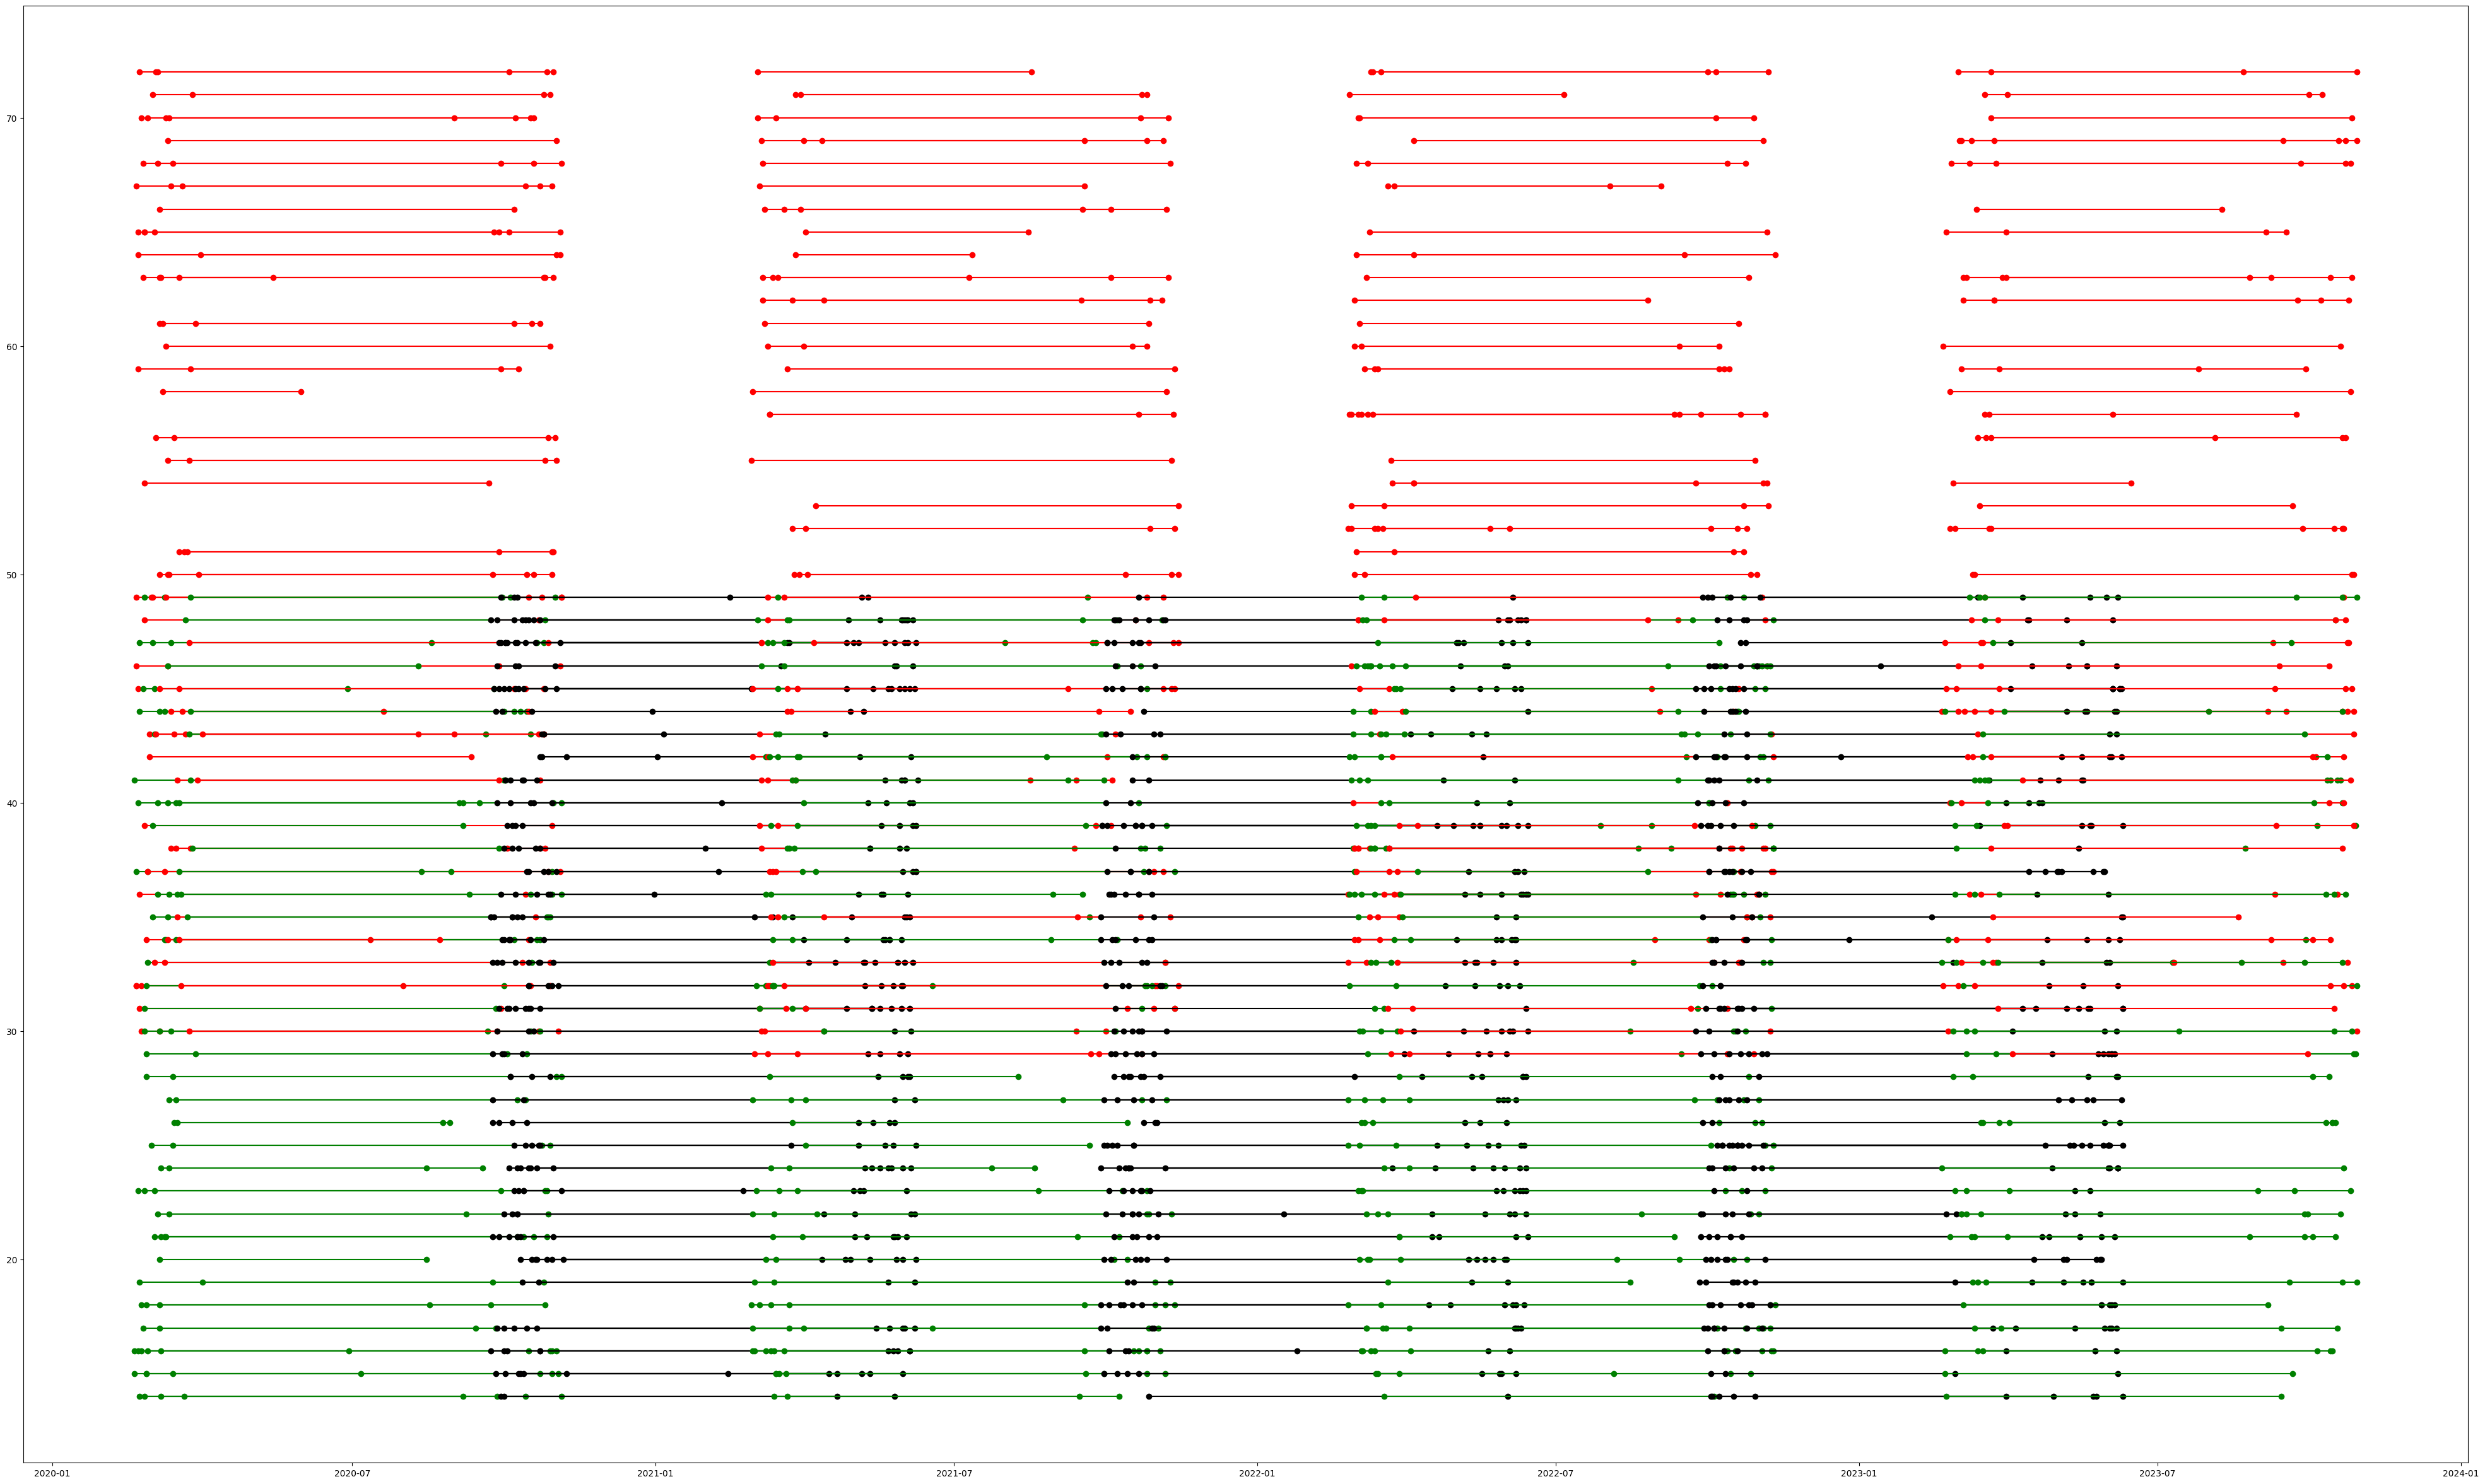

In [8]:
colors = {"Wheat":"red","Soyabean": "black","Chana":"Green"}
plt.figure(figsize=(50,30))
for i in df.iterrows():    
    x_start = datetime.strptime(i[1]['sdate'], '%d %B %Y')
    x_end = datetime.strptime(i[1]['edate'], '%d %B %Y')
    y = i[1]['bags_count']
    plt.plot([x_start, x_end], [y, y], marker='o', linestyle='-', color=colors[i[1]['item']])
plt.savefig('fig1.png')    

In [9]:
df.to_excel('data_generated-02.xlsx')